In [9]:
import pandas as pd
import requests
from io import StringIO

def download_latest_csvs(cases_url, deaths_url):
    caseCSV=requests.get(cases_url).text
    caseDF=pd.read_csv(StringIO(caseCSV))
    deathCSV=requests.get(deaths_url).text
    deathDF=pd.read_csv(StringIO(deathCSV))
    return caseDF, deathDF

In [10]:
cases_url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv"
deaths_url = "https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv"
casesDF, deathsDF = download_latest_csvs(cases_url, deaths_url)

In [11]:
depURL="https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathsinvolvingcovid19bylocalareaanddeprivation%2f1march2020to31may2020/referencetablesworkbook1.xlsx"

In [12]:
import openpyxl

In [13]:
import numpy as np

In [14]:
depURL

'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathsinvolvingcovid19bylocalareaanddeprivation%2f1march2020to31may2020/referencetablesworkbook1.xlsx'

In [15]:
depRequest=requests.get(depURL)

output=open('../data/covid_deprivation_gender.xlsx','wb')
output.write(depRequest.content)
output.close()


In [17]:
depDF=pd.read_excel('../data/covid_deprivation_gender.xlsx',"Table 3")

In [18]:
depDF=depDF.drop([0,1])

In [19]:
depDF.index=np.arange(0,len(depDF))

In [20]:
droprange=np.arange(92,114)

In [21]:
depDF.drop(droprange,inplace=True)

In [22]:
new_header = depDF.iloc[0] #grab the first row for the header
depDF = depDF[1:] #take the data less the header row
depDF.columns = new_header #set the header row as the df header



In [23]:
depDF

,Cause of death,Sex,Decile,NaN,March,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3 month - March to May,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Deaths,Rate,NaN,Lower CI,Upper CI,NaN,...,Rate,NaN,Lower CI,Upper CI,NaN,Deaths,Rate,NaN,Lower CI,Upper CI
2,All causes,Persons,1 (most deprived),NaN,5023,131.8,NaN,128.1,135.5,NaN,...,124.7,NaN,121.1,128.3,NaN,17641,466.2,NaN,459.3,473.2
3,All causes,Persons,2,NaN,5087,123.1,NaN,119.7,126.5,NaN,...,108.2,NaN,105,111.4,NaN,17769,431.4,NaN,425,437.7
4,All causes,Persons,3,NaN,4953,111.2,NaN,108.1,114.4,NaN,...,99.7,NaN,96.8,102.6,NaN,17253,387.7,NaN,381.9,393.5
5,All causes,Persons,4,NaN,4921,98.9,NaN,96.2,101.7,NaN,...,90.7,NaN,88,93.3,NaN,17011,342.5,NaN,337.4,347.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Non COVID-19,Females,6,NaN,2330,68.8,NaN,66,71.7,NaN,...,55.5,NaN,52.9,58,NaN,6727,198.1,NaN,193.3,202.8
88,Non COVID-19,Females,7,NaN,2330,67.5,NaN,64.7,70.3,NaN,...,52.3,NaN,49.8,54.7,NaN,6677,192.1,NaN,187.5,196.8
89,Non COVID-19,Females,8,NaN,2200,62.3,NaN,59.6,64.9,NaN,...,52,NaN,49.6,54.4,NaN,6555,185.2,NaN,180.7,189.7
90,Non COVID-19,Females,9,NaN,2138,59.5,NaN,57,62.1,NaN,...,49.4,NaN,47.1,51.7,NaN,6497,179.6,NaN,175.2,184


In [15]:
newColumnList=['Cause of death',
 'Sex',
 'Decile',
 1,
 'MarchDeaths',
 'MarchRate',
 'MarchNaN',
 'MarchLowCI',
 'MarchUpperCI',
 'MarchNaN2',
 'AprilDeaths',
 'AprilRate',
 'AprilNaN',
 'AprilLowCI',
 'AprilUpperCI',
 'AprilNaN2',
 'MayDeaths',
 'MayRate',
 'MayNaN',
 'MayLowCI',
 'MayUpperCI',
 'MayNaN2',
 'MarchMayDeaths',
 'MarchMayRate',
 'MarchMayNaN',
 'MarchMayLowCI',
 'MarchMayUpperCI']

In [16]:
depDF.columns=newColumnList

In [17]:
depDFSummary=depDF[['Cause of death','Sex','Decile','MarchMayDeaths','MarchMayRate','MarchMayLowCI','MarchMayUpperCI']]

In [18]:
depDFSummary.columns=['DeathCause','Sex','Decile','Deaths','Rate','LowerCI','UpperCI']

In [19]:
depDFSummary=depDFSummary.fillna("")

In [20]:
covDepDF=depDFSummary[depDFSummary['DeathCause'].str.match("COVID-19")]

In [21]:
covDepDF.Decile=list(np.arange(1,11))*3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
covDepDF["Deaths"] = pd.to_numeric(covDepDF["Deaths"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
covDepDF["Rate"]=pd.to_numeric(covDepDF["Rate"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
covDepDF["LowerCI"]=pd.to_numeric(covDepDF["LowerCI"])
covDepDF["UpperCI"]=pd.to_numeric(covDepDF["UpperCI"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
covDepDF.index=np.arange(0,len(covDepDF))

In [28]:
covDepDF=covDepDF.drop(columns='DeathCause')

In [29]:
covDepDF

,Sex,Decile,Deaths,Rate,LowerCI,UpperCI
0,Persons,1,4801,128.3,124.7,132.0
1,Persons,2,5123,124.8,121.4,128.3
2,Persons,3,5100,114.5,111.3,117.6
3,Persons,4,4385,88.3,85.7,90.9
4,Persons,5,4346,80.3,78.0,82.7
5,Persons,6,4225,73.2,71.0,75.4
6,Persons,7,4266,71.8,69.7,74.0
7,Persons,8,4259,70.3,68.1,72.4
8,Persons,9,4139,67.0,65.0,69.0
9,Persons,10,3715,58.8,56.9,60.7


In [43]:
covDepAll=covDepDF[covDepDF['Sex'].str.match('Persons')].drop(columns="Sex")
covDepMen=covDepDF[covDepDF['Sex'].str.match('Males')].drop(columns="Sex")
covDepWomen=covDepDF[covDepDF['Sex'].str.match('Females')].drop(columns="Sex")

In [ ]:
covDepMen.to_csv("../data/deprivation_men.csv")
covDepWomen.to_csv("../data/deprivation_women.csv")
covDepAll.to_csv("../data/deprivation_all.csv")

In [47]:
cDM=covDepMen.to_numpy()
cDW=covDepWomen.to_numpy()
cDA=covDepAll.to_numpy()

In [46]:
covDepMen

,Decile,Deaths,Rate,LowerCI,UpperCI
10,1,2694,172.0,165.3,178.7
11,2,2812,164.5,158.3,170.7
12,3,2828,153.1,147.4,158.9
13,4,2433,116.3,111.6,121.0
14,5,2389,105.7,101.4,110.0
15,6,2422,100.7,96.6,104.8
16,7,2366,95.1,91.2,99.0
17,8,2314,91.6,87.8,95.4
18,9,2242,87.3,83.6,90.9
19,10,2069,77.6,74.2,81.0


In [55]:
cDMX=cDM[:,0]
cDMY=cDM[:,1]

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

[]

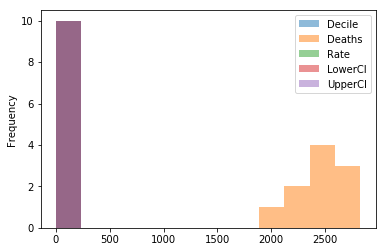

In [63]:
np.histogram(cDM[:,1],bins=)

(array([1, 0, 1, 2, 3, 0, 0, 0, 1, 2]),
 array([2069. , 2144.9, 2220.8, 2296.7, 2372.6, 2448.5, 2524.4, 2600.3,
        2676.2, 2752.1, 2828. ]))

In [64]:
cDM

array([[1.000e+00, 2.694e+03, 1.720e+02, 1.653e+02, 1.787e+02],
       [2.000e+00, 2.812e+03, 1.645e+02, 1.583e+02, 1.707e+02],
       [3.000e+00, 2.828e+03, 1.531e+02, 1.474e+02, 1.589e+02],
       [4.000e+00, 2.433e+03, 1.163e+02, 1.116e+02, 1.210e+02],
       [5.000e+00, 2.389e+03, 1.057e+02, 1.014e+02, 1.100e+02],
       [6.000e+00, 2.422e+03, 1.007e+02, 9.660e+01, 1.048e+02],
       [7.000e+00, 2.366e+03, 9.510e+01, 9.120e+01, 9.900e+01],
       [8.000e+00, 2.314e+03, 9.160e+01, 8.780e+01, 9.540e+01],
       [9.000e+00, 2.242e+03, 8.730e+01, 8.360e+01, 9.090e+01],
       [1.000e+01, 2.069e+03, 7.760e+01, 7.420e+01, 8.100e+01]])

In [66]:
cDMBins=cDM[:,0]

In [67]:
cDMDeaths=cDM[:,1]

In [69]:
cDMBins

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

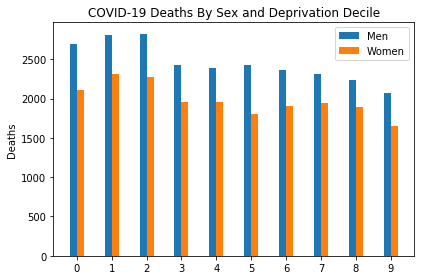

In [75]:
import matplotlib.pyplot as plt
xlabels = cDM[:,0]
men_deaths= cDM[:,1]
women_deaths = cDW[:,1]
all_deaths = cDA[:,1]

x = np.arange(len(xlabels))
width = 0.2  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_deaths, width, label='Men')
rects2 = ax.bar(x + width/2, women_deaths, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths')
ax.set_title('COVID-19 Deaths By Sex and Deprivation Decile')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()


In [80]:
covDepMen['Deaths'].tolist()

[2694, 2812, 2828, 2433, 2389, 2422, 2366, 2314, 2242, 2069]

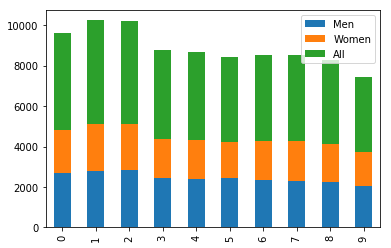

In [92]:
column_names = ['Men', 'Women', 'All']
menD = covDepMen['Deaths'].tolist()
womenD = covDepWomen['Deaths'].tolist()
allD = covDepAll['Deaths'].tolist()


df = pd.DataFrame({'Men':menD,'Women':womenD,'All':allD})
df.plot.bar(stacked=True)